**Proyek Mandiri LSTM**

Import library

In [73]:
import numpy as np
import pandas as pd 
from google.colab import drive

from matplotlib import pyplot as plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.metrics import mean_squared_error
from math import sqrt



In [74]:
pip install EMD-signal

In [75]:
from PyEMD import EMD

Load Dataset

In [76]:
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
path_train_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/ABBV_train.csv'
df_train = pd.read_csv(path_train_dataset)
df = pd.read_csv(path_train_dataset)
# df_train = df_train[['open','high','low']]
df_train = df_train[['close']]


In [78]:
# df_train.tail()
df_train_target = df[['close']]

In [79]:
#load test set
path_test_dataset = 'gdrive/My Drive/S2/PML/proyek_mandiri/ABBV_test.csv'
df_test = pd.read_csv(path_test_dataset)
test_valid = df_test[['close']]
df_test_save = df_test
# df_test.head()
# df_test = df_test[['open','high','low']]
df_test = df_test[['close']]

In [80]:
df_train.shape

(982, 1)

In [81]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,36.370,36.420,35.825,36.25,13858795,ABBV
1,2013-02-11,36.130,36.180,35.750,35.85,6031957,ABBV
2,2013-02-12,35.770,35.900,35.200,35.42,7473991,ABBV
3,2013-02-13,35.420,35.570,35.150,35.27,4860053,ABBV
4,2013-02-14,35.050,36.730,35.010,36.57,7570052,ABBV
...,...,...,...,...,...,...,...
977,2016-12-23,61.780,62.395,61.470,62.34,4798112,ABBV
978,2016-12-27,62.520,63.015,62.410,62.50,5396206,ABBV
979,2016-12-28,62.510,62.750,62.250,62.27,5190362,ABBV
980,2016-12-29,62.390,63.060,62.390,62.73,4990040,ABBV


In [82]:
import pylab as plt

In [83]:
a_list = list(range(0, 982))
print(a_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [84]:
data = df_train.values
data = data.reshape(982,)
pos = np.array(a_list)
# print(s.shape)
# print(t.shape)

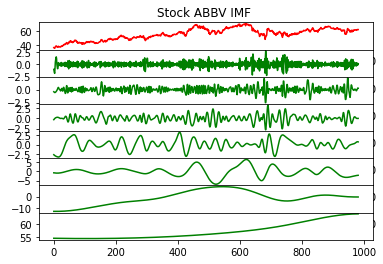

In [85]:
emd = EMD()
imfs = emd(data,pos)

N = imfs.shape[0]+1

plt.subplot(N,1,1)
plt.plot(pos, data, 'r')
plt.title("Stock ABBV IMF ")
plt.xlabel("Time [s]")

for n, imf in enumerate(imfs):
    plt.subplot(N,1,n+2)
    plt.plot(pos, imf, 'g')
    plt.subplots_adjust(hspace = .00001)
    # plt.title("IMF "+str(n+1))
    # plt.xlabel("Time [pos]")

# plt.tight_layout()
plt.savefig('simple_example')
plt.show()

In [86]:
N

8

In [87]:
# df_train_imf = pd.DataFrame(imfs[0], columns = ['close'])
#df_train_imf = pd.DataFrame(imfs[1], columns = ['close'])
# df_train_imf = pd.DataFrame(imfs[5], columns = ['close'])
idx = 6
df_train_imf = pd.DataFrame(imfs[idx], columns = ['close'])
print(df_train_imf)

         close
0    54.527626
1    54.525557
2    54.523505
3    54.521472
4    54.519458
..         ...
977  64.082988
978  64.084740
979  64.086218
980  64.087423
981  64.088355

[982 rows x 1 columns]


In [88]:
df_train = df_train_imf

In [89]:
df_test_save 

,date,open,high,low,close,volume,Name
0,2017-01-03,62.920,63.0300,61.935,62.41,9328198,ABBV
1,2017-01-04,62.640,63.7999,62.640,63.29,8674823,ABBV
2,2017-01-05,63.380,63.9500,63.030,63.77,5359393,ABBV
3,2017-01-06,63.881,64.0000,63.520,63.79,4722267,ABBV
4,2017-01-09,63.800,64.3800,63.750,64.21,8794509,ABBV
...,...,...,...,...,...,...,...
272,2018-02-01,112.240,117.5300,112.230,116.34,9943452,ABBV
273,2018-02-02,115.500,117.9300,114.920,115.17,7184413,ABBV
274,2018-02-05,113.000,115.5350,109.400,109.51,9827825,ABBV
275,2018-02-06,104.910,113.5200,101.000,111.20,14107829,ABBV


In [90]:
# df_train

Preprocessing

In [91]:
#preproceesing training data
add = df_train[-7:]
test_data = add
test_data.reset_index()

test_data = test_data.append(df_test)
test_data

,close
975,64.078657
976,64.080960
977,64.082988
978,64.084740
979,64.086218
...,...
272,116.340000
273,115.170000
274,109.510000
275,111.200000


In [92]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(df_train)
scaled_X_train = Xscaler.transform(df_train)


In [93]:
scaled_X_train

array([[1.18924883e-02],
       [1.16786141e-02],
       [1.14666241e-02],
       [1.12565196e-02],
       [1.10483017e-02],
       [1.08419716e-02],
       [1.06375307e-02],
       [1.04349801e-02],
       [1.02343211e-02],
       [1.00355550e-02],
       [9.83868323e-03],
       [9.64370743e-03],
       [9.45062922e-03],
       [9.25945025e-03],
       [9.07017217e-03],
       [8.88279663e-03],
       [8.69732528e-03],
       [8.51375977e-03],
       [8.33210175e-03],
       [8.15235287e-03],
       [7.97451477e-03],
       [7.79858911e-03],
       [7.62457754e-03],
       [7.45248170e-03],
       [7.28230324e-03],
       [7.11404382e-03],
       [6.94770509e-03],
       [6.78328868e-03],
       [6.62079626e-03],
       [6.46022947e-03],
       [6.30158996e-03],
       [6.14487938e-03],
       [5.99009938e-03],
       [5.83725161e-03],
       [5.68633771e-03],
       [5.53735935e-03],
       [5.39031816e-03],
       [5.24521580e-03],
       [5.10205391e-03],
       [4.96083415e-03],


In [94]:
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(df_train_target)
scaled_y_train = Yscaler.transform(df_train_target)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)
 
scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(982, 1)
(982,)


In [95]:
scaled_y_train

array([0.        , 0.0272525 , 0.01612903, 0.0041713 , 0.        ,
       0.03615128, 0.06423804, 0.08120133, 0.09288098, 0.09760845,
       0.08870968, 0.05839822, 0.05061179, 0.04060067, 0.04588432,
       0.07063404, 0.08259177, 0.06229143, 0.06868743, 0.06173526,
       0.05756396, 0.06674082, 0.05283648, 0.05283648, 0.06368187,
       0.08982202, 0.08036707, 0.08592881, 0.10539488, 0.08954394,
       0.1028921 , 0.11262514, 0.13737486, 0.13570634, 0.15322581,
       0.16268076, 0.1512792 , 0.14738598, 0.17602892, 0.1679644 ,
       0.1807564 , 0.20244716, 0.23220245, 0.2205228 , 0.21746385,
       0.17157953, 0.1996663 , 0.19382647, 0.19605117, 0.19799778,
       0.24833148, 0.27447164, 0.25166852, 0.24944383, 0.29393771,
       0.27697442, 0.29977753, 0.28587319, 0.24249166, 0.26167964,
       0.25917686, 0.26807564, 0.22858732, 0.24944383, 0.27085651,
       0.25778643, 0.28031146, 0.29922136, 0.30422692, 0.33092325,
       0.30561735, 0.31340378, 0.31952169, 0.31479422, 0.28281

In [96]:
n_input = 7 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= df_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
#b_size = 64
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)
 
print(generator[0][0].shape)

(32, 7, 1)


In [97]:
print(df_train.shape)

(982, 1)


Arsitektur LSTM

In [98]:
regressor = Sequential()
regressor.add(LSTM(units = 100, activation='relu',return_sequences = True, input_shape = (n_input, n_features)))
regressor.add(LSTM(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
opt = keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer=opt, loss='mse')
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 100)            40800     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [99]:
#  regressor.fit_generator(generator,epochs=40)
regressor.fit_generator(generator,epochs=40)
 # test 1 epoch 40
 # test 2 epoch 60

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 4s 13ms/step - loss: 0.2085
Epoch 2/40
31/31 [==============================] - 0s 14ms/step - loss: 0.1398
Epoch 3/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0659
Epoch 4/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0472
Epoch 5/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0328
Epoch 6/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0194
Epoch 7/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0188
Epoch 8/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0286
Epoch 9/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0210
Epoch 10/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0175
Epoch 11/40
31/31 [==============================] - 0s 14ms/step - loss: 0.0209
Epoch 12/40
31/31 [==============================] - 0s 13ms/step - loss: 0.0099
Epoch 13/40
31/31 [=============================

In [100]:
scaled_X_test = Xscaler.transform(test_data)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(test_data)), length=n_input, batch_size=b_size)
# print(test_generator[0][0].shape)

In [101]:
y_pred_scaled = regressor.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [102]:
y_pred

array([[60.89367 ],
       [60.808712],
       [60.71051 ],
       [60.634052],
       [60.576305],
       [60.555336],
       [60.541203],
       [60.382263],
       [60.33847 ],
       [60.171017],
       [59.93542 ],
       [59.6904  ],
       [59.370647],
       [59.03235 ],
       [59.037086],
       [58.989918],
       [58.875965],
       [58.789234],
       [58.66652 ],
       [58.56232 ],
       [58.509995],
       [58.49084 ],
       [58.528748],
       [58.457348],
       [58.386745],
       [58.467506],
       [58.486763],
       [58.43346 ],
       [58.394184],
       [58.35056 ],
       [58.349148],
       [58.403084],
       [58.49704 ],
       [58.6252  ],
       [58.730503],
       [58.87329 ],
       [59.024654],
       [59.157486],
       [59.206028],
       [59.26966 ],
       [59.33926 ],
       [59.452816],
       [59.661877],
       [59.83019 ],
       [60.001694],
       [60.19406 ],
       [60.474426],
       [60.727154],
       [60.9839  ],
       [61.24952 ],


In [103]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [104]:
print(test_valid)

      close
0     62.41
1     63.29
2     63.77
3     63.79
4     64.21
..      ...
272  116.34
273  115.17
274  109.51
275  111.20
276  113.62

[277 rows x 1 columns]


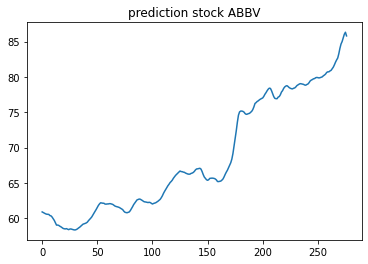

In [105]:
import matplotlib.pyplot as plt
plt.plot(y_pred)
plt.title('prediction stock ABBV')
plt.show()

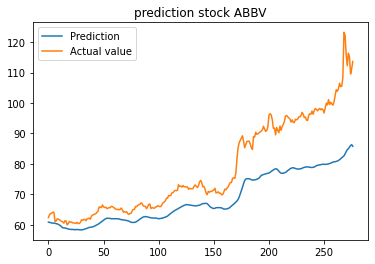

In [106]:
import matplotlib.pyplot as plt

plt.plot(y_pred, label = "Prediction")

# plotting the line 2 points 
plt.plot(test_valid, label = "Actual value")
# plt.xlabel('x - axis')
# Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('prediction stock ABBV')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [107]:
# loss = keras.losses.mean_squared_error(test_valid, y_pred)
mse = mean_squared_error(test_valid, y_pred)
rmse = sqrt(mse)

In [108]:
print("mse = ",mse)
print("rmse = ",rmse)

mse =  146.81205716328614
rmse =  12.116602542102557
